# *`05_Regularization Techniques`*

**Regularization** is a set of techniques used to reduce overfitting in machine learning models. It involves grading features based on importance and eliminating factors that don't impact prediction outcomes.

A model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don't really represent the true properties of your data, but random chance.

To understand it better, let's first understand ***`BIAS VARIANCE TRADE-OFF`***

> **`BIAS:`** The inability of the ML model to truly capture relationship in a training data.
\
> **`VARIANCE:`** Difference of fits on different datasets.

* Let's say if `train_set_error` = 10 & `test_set_error` = 100, the difference equals 90. which is `High Variance`.
* And if `train_set_error` = 10 & `test_set_error` = 15, the difference equals 5. which is `Low Variance`.

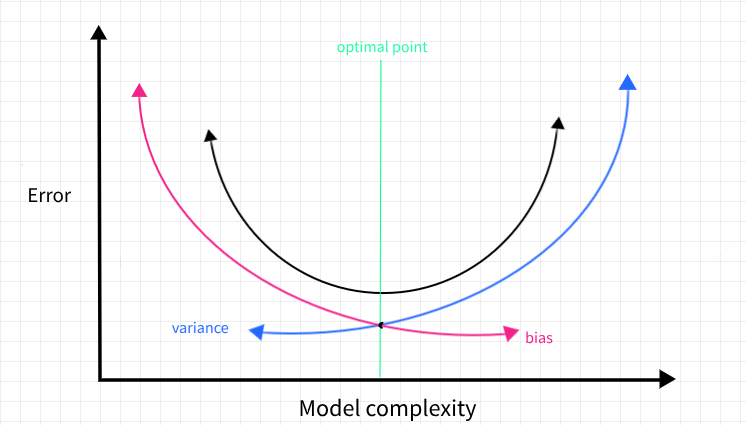



\
* **When does 'Overfitting' happens ?**
> When Machine Learning model performs very well on training set but poorly on test set. The error is good on training set but high on test set.

\
* **When 'Underfitting' takes place ?**
> The model was not able to capture relationship between the features leads to underfitting. The relationship between the dependent and indepedent variable cannot be explained.

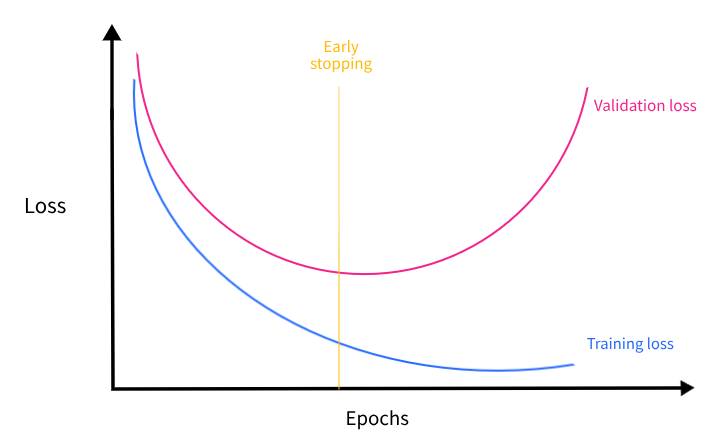

\
So you need to find a sweet spot between keeping one at the expense of other. You analyze it based on the loss curves and find a middle way. *You prefer to keep high bias for low variance sometimes.*

To overcome the bias variance trade off, we use techniques such as:
1. Regularization
2. Bagging
3. Boosting


***Regularization*** as discussed above helps you overcome overfitting by introducing some additional information to your model about the data.

#### Types of Regularization
1. Ridge Regression (L2)
2. Lasso Regression (L1)
3. ElasticNet Regression (L1 & L2)



## Ridge Regression (L2 - Regularization)

Ridge regression is a statistical regularization technique. It corrects for overfitting on training data in machine learning models. Ridge regression—also known as L2 regularization—is one of several types of regularization for linear regression models.*italicized text*

**How loss is calculated in Ridge ?**
* In Linear Regression, $\beta$ coefficient tells you how much each $X_i$ is repsonsible for the changes in $y_{hat}$.
* A high of $\beta$ will result in overfitting.
* If the value of $\beta$ is too low, it is underfitting.
* Therefore, a regularizing factor $\lambda$ is introduced in the loss function to control $\beta$ values.

\
Regularized Loss Function for 2D data is given as:

$$
Loss_{\beta_0, \beta} = \sum_{i=0}^{n} (y_i - y_{hat_i})^2 +\lambda (\beta)^2
$$
\
$$
\lambda (\beta_1^2 + \beta_2^2 + \beta_3^2 + ...... + \beta_n^2)
$$
\
Since, we take square of $\beta$. Ridge is called L2 Regularization.

\
**Ridge Regression** for N-dimensional data is given as:

\
$$
Loss_{\beta_0, W} = (XW - y)^T . (XW - y) + \lambda ||W^2||
$$

Where, weights are calculated as:
$$
W = [X^T X + \lambda I]^{-1} X^T
$$

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

### Implementing custom Ridge Regression class

In [2]:
# Implementing the Ridge regression class based on the formula above
class RidgeRegression:
  def __init__(self, alpha = 0.01):
    self.coef_ = None
    self.intercept_ = None
    self.alpha = alpha # setting the lambda/regularizer

  def fit(self, x, y):
    # Assign an array ones to input x
    intercept_column = np.ones((x.shape[0], 1))

    # Stack the intercept column horizontally with the original feature matrix
    x = np.hstack((intercept_column, x))

    # Create an Identity matrix with rows equal to the no of features in X
    identity_matrix = np.identity(x.shape[1])

    # Setting I[0][0] is likely setting the strength of the biad term to zero. Bias term represents the baseline value of the target variable when all other features are zero
    identity_matrix[0][0] = 0
    weights = np.linalg.inv(np.dot(x.T, x) + self.alpha * identity_matrix).dot(x.T).dot(y)

    # Fetch the intercept and β coefficients
    self.intercept_ = weights[0]
    self.coef_ = weights[1:]

  def predict(self, x):
    return np.dot(x, self.coef_) + self.intercept_

### Get data

In [3]:
# Lets create a toy dataset
from sklearn.datasets import make_regression
dataset = make_regression(n_samples = 500,
                          n_features = 10,
                          n_informative = 4,
                          n_targets = 1,
                          noise = 20,
                          random_state = 42)

# Create a pandas dataframe
data = pd.DataFrame(dataset[0], columns = [f'X{i}' for i in range(1, dataset[0].shape[1] + 1)])
data['target'] = dataset[1]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
0,0.500143,-0.272545,-2.230468,1.173442,0.226684,0.695864,-0.553090,-0.561558,-0.340599,-1.781158,-42.599199
1,-0.563725,-0.321386,-0.897254,-0.825497,0.075805,-0.147057,0.975120,-0.677162,0.412931,-0.012247,-46.875688
2,0.155191,-0.009300,-0.409282,0.000207,-0.524088,1.121031,-0.822420,0.152355,-0.327895,-0.694713,-59.762451
3,0.301107,-1.785866,-0.557423,0.573128,-0.412998,-0.848429,-0.031439,-0.926698,-0.359630,0.595029,-34.142096
4,-0.213447,-1.407464,0.243687,-1.448084,0.244967,0.232050,-0.471038,-0.506943,-0.718444,-0.822220,20.046558


In [4]:
data.shape

(500, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   X3      500 non-null    float64
 3   X4      500 non-null    float64
 4   X5      500 non-null    float64
 5   X6      500 non-null    float64
 6   X7      500 non-null    float64
 7   X8      500 non-null    float64
 8   X9      500 non-null    float64
 9   X10     500 non-null    float64
 10  target  500 non-null    float64
dtypes: float64(11)
memory usage: 43.1 KB


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.072188,0.004027,0.020149,-0.054563,0.005058,-0.000549,-0.006497,-0.032688,0.045750,0.003143,-0.803450
std,0.958350,1.003579,1.061453,0.995664,1.008065,1.041198,1.017848,0.980525,0.938045,0.956440,61.656821
min,-3.176704,-2.991136,-2.940389,-2.704392,-3.241267,-3.170426,-3.019512,-2.839079,-3.007632,-2.703232,-220.102957
25%,-0.508140,-0.708796,-0.678549,-0.770440,-0.681772,-0.695476,-0.660905,-0.771787,-0.532287,-0.607822,-42.658596
50%,0.024099,0.021525,-0.025355,-0.043463,0.023546,0.019309,-0.045020,0.022736,0.096510,0.040920,-3.434637
75%,0.687920,0.643416,0.749506,0.598299,0.641757,0.666112,0.690822,0.673563,0.680031,0.639625,40.226143
max,3.852731,3.137749,2.985259,3.243093,3.152057,3.926238,2.755218,2.601683,3.078881,3.076860,177.827278


In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(data.iloc[:,:-1].values,
                                         data.iloc[:,-1].values,
                                         test_size = 0.2,
                                         random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

### 1. Sklearn: Linear Regression

In [8]:
# Perform the Linear Regression on the dataset
lr = LinearRegression()

# Fit the data
lr.fit(X_train, y_train)

# Make predictions on test data
y_preds_lr = lr.predict(X_test)

# Make a dataframe of the coefficients and intercept
coef = pd.DataFrame(np.array(lr.coef_).reshape(1, 10) , columns = data.iloc[:,:-1].columns)
coef['intercept'] = lr.intercept_
coef['r2_score'] = r2_score(y_test, y_preds_lr)
coef

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,intercept,r2_score
0,0.600378,-1.727548,19.666229,2.020171,45.491221,-1.713826,-2.577801,27.90238,-0.24068,16.506237,-0.186845,0.91492


### 2. Sklearn: Ridge Regression

In [9]:
# Perform the Linear Regression on the dataset
ridge = Ridge(alpha = 0.01)

# Fit the data
ridge.fit(X_train, y_train)

# Make predictions on test data
y_preds_ridge = ridge.predict(X_test)

# Make a dataframe of the coefficients and intercept
coef_ridge = pd.DataFrame(np.array(ridge.coef_).reshape(1, 10) , columns = data.iloc[:,:-1].columns)
coef_ridge['intercept'] = ridge.intercept_
coef_ridge['r2_score'] = r2_score(y_test, y_preds_ridge)
coef_ridge

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,intercept,r2_score
0,0.600404,-1.727489,19.665728,2.020069,45.490065,-1.713848,-2.577696,27.901578,-0.240573,16.505819,-0.186916,0.914922


### 3. Custom Ridge Regression

In [10]:
# Perform the Linear Regression on the dataset
my_ridge = RidgeRegression(alpha = 0.001)

# Fit the data
my_ridge.fit(X_train, y_train)

# Make predictions on test data
y_preds_my_ridge = my_ridge.predict(X_test)

# Make a dataframe of the coefficients and intercept
coef_my_ridge = pd.DataFrame(np.array(my_ridge.coef_).reshape(1, 10) , columns = data.iloc[:,:-1].columns)
coef_my_ridge['intercept'] = my_ridge.intercept_
coef_my_ridge['r2_score'] = r2_score(y_test, y_preds_my_ridge)
coef_my_ridge

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,intercept,r2_score
0,0.600381,-1.727542,19.666179,2.02016,45.491106,-1.713829,-2.577791,27.9023,-0.24067,16.506195,-0.186852,0.914921


### Key understanding about Ridge Regression

$$
L = \sum (y_i - y_{hat_i})^2 + \lambda ||W^2||
$$

where, $\lambda ||W^2||$ is the shrinkage coefficients

\
**How coefficients get affected?**

* $\lambda$ increases -> (0 - $∞$)
\
$\lambda$ -> 0 : linear regression

* The coefficients shrinks or decreases towards 0 but they are never 0. Their value will be very close to zero but never zero.

**Higher values are impacted more**

* Higher the $alpha$, the stronger the regularization.

* When coefficient is larger, squaring it results in an even larger value.

* As $\lambda$ increases, the penalty for having large coefficients becomes more significant.

* Consequently, the optimization process tries to minimize the total loss, which includes both the data fitting term and regularization term.

* To achieve this it reduces the impact of larger coefficients by pushing the, towards zero.

## Lasso Regression (L1 - Regularization)

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

\
$$
L = \sum (y_i - y_{hat_i})^2 + \lambda ||\beta||
$$
\
$$
\lambda (|\beta_1| + |\beta_2| + |\beta_3| + ...... + |\beta_n|)
$$
\
$\lambda ||\beta||$ - L1 Norm - Absolute values of $\beta$


**Important Points**
1. In case of lasso regression, the coefficients become zero for higher values of $\lambda$.
2. Lasso will make columns with less importance to zero. So, in a way we perform feature se;ection for higher balues of $\lambda$.
3. Lasso is preferred for higher values of $\lambda$.

In [33]:
# Create the dataset with one feature
lasso_regression = make_regression(n_samples = 300,
                                   n_features = 1,
                                   n_targets = 1,
                                   bias = 2.0,
                                   noise = 30)

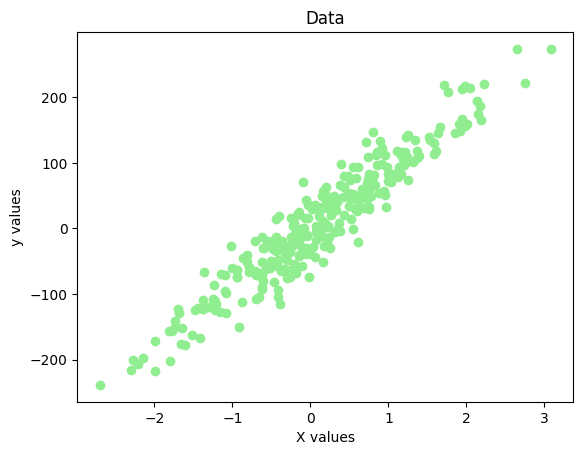

In [34]:
# Plot the data
plt.scatter(lasso_regression[0], lasso_regression[1], c = 'lightgreen')
plt.title('Data')
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

### 1. Fit the data on linear regression

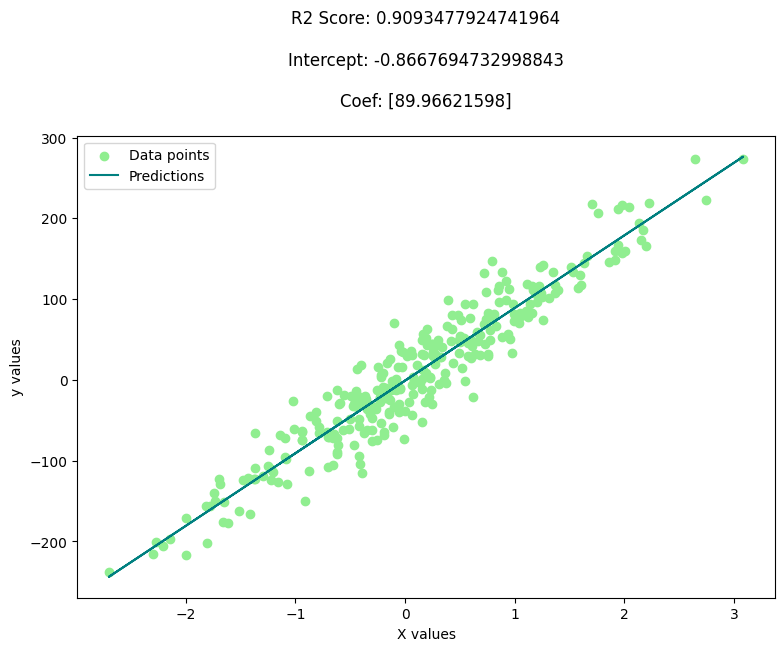

In [35]:
X_data = lasso_regression[0]
y_data = lasso_regression[1]

# Create a linear regression model and fit the data on it
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_data, y_data)

# Make predictions
y_preds_lin_reg = lin_reg.predict(X_data)

# Plot the predictions of linear regression and print the r2 score,coef and intercept values
plt.figure(figsize = (9,6))
plt.scatter(X_data, y_data, color = 'lightgreen', label = 'Data points')
plt.plot(X_data, y_preds_lin_reg, color = 'teal', label = 'Predictions')
plt.title('Linear Regression Model')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.title(f"R2 Score: {r2_score(y_data, y_preds_lin_reg)}\n\nIntercept: {lin_reg.intercept_}\n\nCoef: {lin_reg.coef_}\n")
plt.show()

### 2. Fit the data on Lasso regression

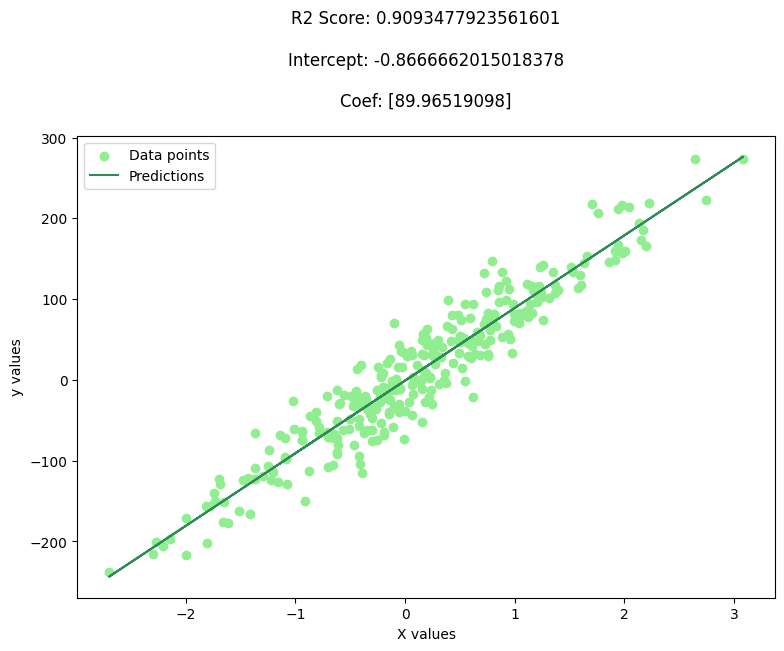

In [36]:
# Create an object of Lasso Regression
lasso = Lasso(alpha = 0.001)

# Fit the data
lasso.fit(X_data, y_data)

# Make predictions
y_preds_lasso = lasso.predict(X_data)

# Plot the predictions of linear regression and print the r2 score,coef and intercept values
plt.figure(figsize = (9,6))
plt.scatter(X_data, y_data, color = 'lightgreen', label = 'Data points')
plt.plot(X_data, y_preds_lasso, color = 'seagreen', label = 'Predictions')
plt.title('Lasso Regression Model')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.title(f"R2 Score: {r2_score(y_data, y_preds_lasso)}\n\nIntercept: {lasso.intercept_}\n\nCoef: {lasso.coef_}\n")
plt.show()

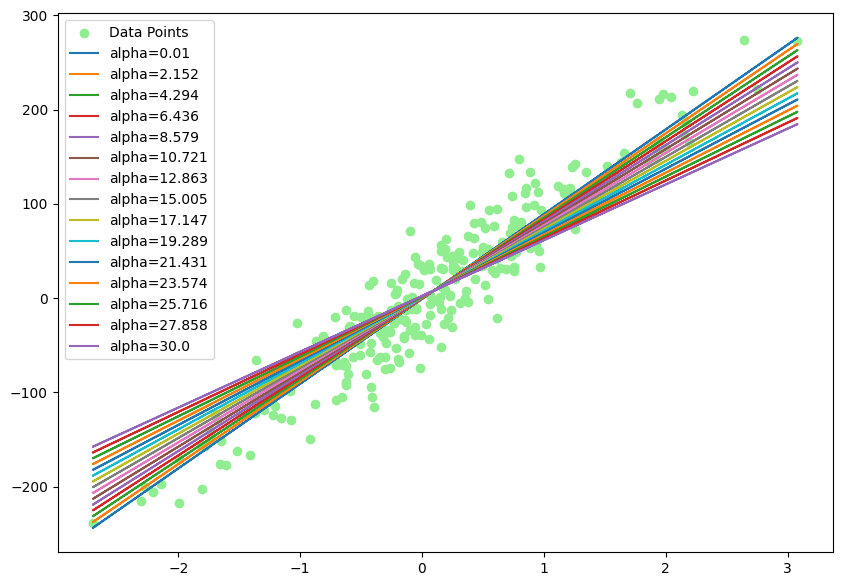

In [37]:
# Lets check the effect of alpha
alphas = np.round(np.linspace(0.01, 30, num = 15), 3)

# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_data, y_data, color = 'lightgreen', label = 'Data Points')

# Plot for each and every alpha, make predictions and plot
for i in alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_data, y_data)
    plt.plot(X_data, lasso.predict(X_data), label = 'alpha={}'.format(i))

plt.legend()
plt.show()

### Key understandings about Lasso Regression

**How coefficients are affected ?**

A very high value of $\lambda$ will make all values zero causing underfitting. Whereas, gradual increase of $\lambda$ willkeep only useful columns.

**Higher Coefficients will get affected more**

It will rapidly reduce overfitting.
$\lambda$ increase - > *overffiting*: decrease, *bias*: increase, *variance*: decrease

**Why Lasso creates Sparsity ?**

When $\lambda$ is increased the coefficients becomes zero, which creates sparsity in the data.

## ElasticNet Regression

Lasso and Ridge regression can be used when a few column are important, which we are well aware of beforehand.

In cases where we are not sure of which columns are useful. In that case we use ElasticNet.

\
$$
L = \sum (y_i - y_{hat_i})^2 +  a||W^2|| + b||W||
$$
\
$$
\lambda = a+b
$$
\
$$
l_{1_{ratio}} = \frac{a}{a+b}
$$

By default $a = 0.5, b = 0.5$. $\lambda$ and $l_{1_{ratio}}$ are hyperparameters. If we set $l_{1_{ratio}}$ to $0.9$, then we apply:

>**90% - ridge**
\
>**10% - lasso**


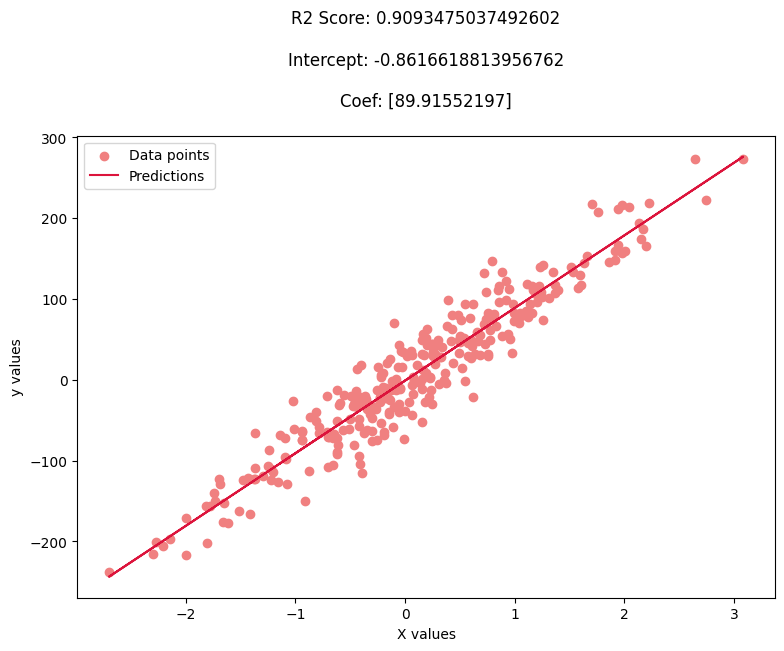

In [40]:
# Create an object of ElasticNet Regression
elastic_net = ElasticNet(alpha=0.005,l1_ratio=0.9)

# Fit the data
elastic_net.fit(X_data, y_data)

# Make predictions
y_preds_en = elastic_net.predict(X_data)

# Plot the predictions of linear regression and print the r2 score,coef and intercept values
plt.figure(figsize = (9,6))
plt.scatter(X_data, y_data, color = 'lightcoral', label = 'Data points')
plt.plot(X_data, y_preds_en, color = 'crimson', label = 'Predictions')
plt.title('ElasticNet Regression Model')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.title(f"R2 Score: {r2_score(y_data, y_preds_en)}\n\nIntercept: {elastic_net.intercept_}\n\nCoef: {elastic_net.coef_}\n")
plt.show()